# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [1]:
#importing tensorflow 2 
% tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Importing neccessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [3]:
from keras.datasets import cifar10 

Using TensorFlow backend.


In [0]:
#Load CIFAR10 dataset available within tensorflow
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print ('Shape of x_train :', x_train.shape)
print ('Shape of x_test :', x_test.shape)
print ('Shape of y_train :', y_train.shape)
print ('Shape of y_test :', y_test.shape)

Shape of x_train : (50000, 32, 32, 3)
Shape of x_test : (10000, 32, 32, 3)
Shape of y_train : (50000, 1)
Shape of y_test : (10000, 1)


In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

> - y_train and y_test is having total 10 types class that we need to predict.
> - We need divide to two category as per problem statement as one dataset having classes from 0 to 4 and other having classes from 5 to 9

## Creating two different dataset i.e. one dataset having classes from 0 to 4 and other having classes from 5 to 9.

In [0]:
index_train_4 = np.where(y_train <= 4)
index_test_4 = np.where(y_test <= 4)

> - selecting all the index position where y_train value is having label <= 4.

In [0]:
X_train_4 = x_train[index_train_4[0]]
X_test_4 = x_test[index_test_4[0]]
y_train_4 = y_train[index_train_4]
y_test_4 = y_test[index_test_4]

> - With the above selected label we are filtering records from the x_train x_test.

In [9]:
print(X_train_4.shape)
print(X_test_4.shape)
print(y_train_4.shape)
print(y_test_4.shape)

(25000, 32, 32, 3)
(5000, 32, 32, 3)
(25000,)
(5000,)


> - Above dataset(X_train_4 and X_test_4) contains all the records for which label value is less than 5.

In [0]:
index_train_9 = np.where((y_train >= 5) & (y_train <= 9))
index_test_9 = np.where((y_test >= 5) & (y_test <= 9))

> - selecting all the index position where y_train value is having label >= 4 and <=9.

In [0]:
X_train_9 = x_train[index_train_9[0]]
X_test_9 = x_test[index_test_9[0]]
y_train_9 = y_train[index_train_9]
y_test_9 = y_test[index_test_9]

> - With the above selected label we are filtering records from the x_train and x_test.

In [12]:
print(X_train_9.shape)
print(X_test_9.shape)
print(y_train_9.shape)
print(y_test_9.shape)

(25000, 32, 32, 3)
(5000, 32, 32, 3)
(25000,)
(5000,)


> - Above dataset(X_train_9 and X_test_9) contains all the records for which label value is less than equal 9 and greater than 4.

### just copying test labels for model evaluation. 

In [0]:
y_test4_to_evaluate = y_test_4
y_test9_to_evaluate = y_test_9

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
# Converting labels to one hot encoding

y_train_4 = tf.keras.utils.to_categorical(y_train_4)
y_test_4 = tf.keras.utils.to_categorical(y_test_4)
y_train_9 = tf.keras.utils.to_categorical(y_train_9,num_classes=10)
y_test_9 = tf.keras.utils.to_categorical(y_test_9,num_classes=10)
y_train_9 = y_train_9[:,5:10] 
y_test_9 = y_test_9[:,5:10]

In [15]:
print(y_train_4.shape)
print(y_test_4.shape)
print(y_train_9.shape)
print(y_test_9.shape)

(25000, 5)
(5000, 5)
(25000, 5)
(5000, 5)


### Visualizing the images in our dataset.

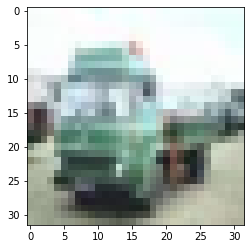

In [16]:
img = np.random.randint(0, X_test_9.shape[0]) # Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test_9[img],cmap='gray') # Show the image from test dataset

## Normalization of our training and test data.

In [0]:
X_train_4 = X_train_4/255 
X_test_4 = X_test_4/255
X_train_9 = X_train_9/255 
X_test_9 = X_test_9/255

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
#Initialize model
model = Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=X_test_4.shape[1:]))

#Add 1'st Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))

#Add 2'nd Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add 1'st Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add 1'st dropout layer
model.add(Dropout(0.25))

# Batcth normalizing
model.add(BatchNormalization())

#Add 3'rd Conv Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

#Add 4'th Conv Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add 2'nd Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add 2'nd dropout layer
model.add(Dropout(0.25))

# Flattening the layer 
model.add(Flatten())

# Dense layer 
model.add(Dense(512,activation ='relu'))

# Output layer 
model.add(Dense(5,activation='softmax'))

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [0]:
# CallBacks 
chkpt = tf.keras.callbacks.ModelCheckpoint('./cifar.h5', 
                                           monitor='val_acc', save_best_only=True,)

> - Saving the best model using checkpoint

In [24]:
history = model.fit(X_train_4,y_train_4,          
          validation_data=(X_test_4,y_test_4),
          epochs=30,
          batch_size=32, callbacks=[chkpt],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 7s 280us/sample - loss: 1.0022 - accuracy: 0.5922 - val_loss: 0.8050 - val_accuracy: 0.6664
Epoch 2/30
25000/25000 [==============================] - 5s 187us/sample - loss: 0.7442 - accuracy: 0.7096 - val_loss: 0.6657 - val_accuracy: 0.7408
Epoch 3/30
25000/25000 [==============================] - 5s 184us/sample - loss: 0.6378 - accuracy: 0.7589 - val_loss: 0.5967 - val_accuracy: 0.7736
Epoch 4/30
25000/25000 [==============================] - 5s 186us/sample - loss: 0.5617 - accuracy: 0.7902 - val_loss: 0.5764 - val_accuracy: 0.7864
Epoch 5/30
25000/25000 [==============================] - 5s 186us/sample - loss: 0.4962 - accuracy: 0.8137 - val_loss: 0.5689 - val_accuracy: 0.7800
Epoch 6/30
25000/25000 [==============================] - 5s 186us/sample - loss: 0.4568 - accuracy: 0.8300 - val_loss: 0.4963 - val_accuracy: 0.8202
Epoch 7/30
25000/25000 [===========================

In [0]:
model.save_weights('weight.hdf5') # to save weights of our model 

> - Weight of the best model is saved as `'weight.hdf5'` file.



In [0]:
model.save('model.hdf5') # to save our model 

> - Best model is saved as `'model.hdf5'` file.


### Visualizing model performance.

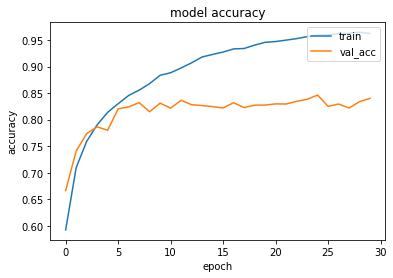

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper right')
plt.show()

## Evaluating the above Model performance. 

In [0]:
# Predicting on test data 
y_pred1 = model.predict_classes(X_test_4)

In [29]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test4_to_evaluate, y_pred1)

0.84

In [30]:
# Classification report  CNN model
print(metrics.classification_report(y_test4_to_evaluate, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       0.95      0.96      0.95      1000
           2       0.74      0.79      0.76      1000
           3       0.79      0.77      0.78      1000
           4       0.85      0.81      0.83      1000

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [0]:
# Loading the model 
model2 =  load_model('model.hdf5')

> - Model created for classes 0-4 is loaded to use on for predicting the 0-5 classes.

In [33]:
#Freezing layers in the model which don't have 'dense' in their name

for layer in model2.layers[:13]:
  if('dense' not in layer.name):                                                #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model2.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

batch_normalization
False
conv2d
False
conv2d_1
False
max_pooling2d
False
dropout
False
batch_normalization_1
False
conv2d_2
False
conv2d_3
False
max_pooling2d_1
False
dropout_1
False
flatten
False
dense
True
dense_1
True


In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10 (Use Transfer Learning)

Achieve an accuracy of more than 85% on test data

In [0]:
chkpt1 = tf.keras.callbacks.ModelCheckpoint('./cifar1.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [37]:
history2 = model2.fit(X_train_9,y_train_9,          
          validation_data=(X_test_9,y_test_9),
          epochs=30,
          batch_size=32, callbacks=[chkpt1],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 4s 175us/sample - loss: 1.1451 - accuracy: 0.6914 - val_loss: 0.5210 - val_accuracy: 0.8108
Epoch 2/30
25000/25000 [==============================] - 4s 149us/sample - loss: 0.4922 - accuracy: 0.8238 - val_loss: 0.4481 - val_accuracy: 0.8364
Epoch 3/30
25000/25000 [==============================] - 4s 149us/sample - loss: 0.3989 - accuracy: 0.8589 - val_loss: 0.4064 - val_accuracy: 0.8530
Epoch 4/30
25000/25000 [==============================] - 4s 150us/sample - loss: 0.3359 - accuracy: 0.8790 - val_loss: 0.3954 - val_accuracy: 0.8592
Epoch 5/30
25000/25000 [==============================] - 4s 150us/sample - loss: 0.2869 - accuracy: 0.8937 - val_loss: 0.3839 - val_accuracy: 0.8630
Epoch 6/30
25000/25000 [==============================] - 4s 152us/sample - loss: 0.2393 - accuracy: 0.9139 - val_loss: 0.4016 - val_accuracy: 0.8650
Epoch 7/30
25000/25000 [===========================

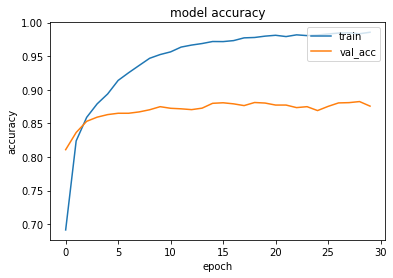

In [55]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper right')
plt.show()

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [47]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [48]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [49]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [0]:
y_trn = twenty_train.target
y_tst = twenty_test.target

In [52]:
vect = TfidfVectorizer()
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm_train = vect.fit_transform(twenty_train.data)
dtm_test = vect.transform(twenty_test.data)
features = vect.get_feature_names()
print (dtm_train.shape)
print (dtm_test.shape)

(2257, 35482)
(1502, 35482)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [53]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(dtm_train, y_trn)
y_pred_class = logreg.predict(dtm_test)
print('test Accuracy ',metrics.accuracy_score(y_tst, y_pred_class))
y_pred_class_train = logreg.predict(dtm_train)
print('train accuracy ',metrics.accuracy_score(y_trn, y_pred_class_train))

test Accuracy  0.9174434087882823
train accuracy  1.0


In [54]:
# Classification report  
print(metrics.classification_report(y_tst, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       319
           1       0.95      0.94      0.95       389
           2       0.93      0.93      0.93       396
           3       0.90      0.94      0.92       398

    accuracy                           0.92      1502
   macro avg       0.92      0.91      0.91      1502
weighted avg       0.92      0.92      0.92      1502

